In [1]:
import pandas as pd
import numpy as np
from itertools import product
import json
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
config = {
    "model_saves":"model_saves",
    "artifacts_dir":"artifacts",
}

In [3]:
def get_base_clf_results(config):
    ALL_FEAT = ["AAC","DPC","CTD",
                "PAAC","APAAC","RSacid",
                "RSpolar","RSsecond","RScharge",
                "RSDHP","Combine"]
    model_dir = config["model_saves"]
    model_set = list(set([x.split("_")[0] for x in os.listdir(model_dir)]))
    
    metrics = {"model":[],"feature":[]}
    for m,f in product(model_set,ALL_FEAT):
        if not os.path.exists(os.path.join(model_dir,f"{m}_{f}","metrics.json")):
            continue
        
        with open(os.path.join(model_dir,f"{m}_{f}","metrics.json"),"r") as f0:
            data = json.load(f0)
            
        for k in data.keys():
            try:
                metrics[k].append(data[k])
            except KeyError:
                metrics[k] = [data[k]]
        
        metrics["model"].append(m)
        metrics["feature"].append(f)
                    
    metric_df = pd.DataFrame.from_dict(metrics,orient="columns")
    
    return metric_df
    

In [4]:
metrics = get_base_clf_results(config)
metrics

,model,feature,accuracy,precision,recall,f1,sensitivity,specificity
0,ExtraTreesClassifier,AAC,0.882769,0.882968,0.882215,0.882499,0.867539,0.896892
1,ExtraTreesClassifier,DPC,0.849725,0.849527,0.849956,0.849623,0.856092,0.843821
2,ExtraTreesClassifier,CTD,0.822974,0.822914,0.822394,0.822592,0.807032,0.837756
3,ExtraTreesClassifier,PAAC,0.876475,0.876543,0.876001,0.876217,0.863451,0.888552
4,ExtraTreesClassifier,APAAC,0.872148,0.872049,0.871831,0.871929,0.863451,0.880212
...,...,...,...,...,...,...,...,...
72,KNN,RSpolar,0.809992,0.810218,0.810628,0.809956,0.827473,0.793783
73,KNN,RSsecond,0.807238,0.807237,0.806517,0.806764,0.787408,0.825625
74,KNN,RScharge,0.806845,0.807193,0.805840,0.806214,0.779231,0.832449
75,KNN,RSDHP,0.810779,0.810543,0.810405,0.810468,0.800491,0.820318


In [5]:
metrics.to_csv(os.path.join(config["artifacts_dir"],"base_clf_results.csv"),index=False)

In [6]:
metrics = metrics.set_index(["model","feature"])
metrics

accuracy  precision    recall        f1   
model                feature                                             
ExtraTreesClassifier AAC       0.882769   0.882968  0.882215  0.882499  \
                     DPC       0.849725   0.849527  0.849956  0.849623   
                     CTD       0.822974   0.822914  0.822394  0.822592   
                     PAAC      0.876475   0.876543  0.876001  0.876217   
                     APAAC     0.872148   0.872049  0.871831  0.871929   
...                                 ...        ...       ...       ...   
KNN                  RSpolar   0.809992   0.810218  0.810628  0.809956   
                     RSsecond  0.807238   0.807237  0.806517  0.806764   
                     RScharge  0.806845   0.807193  0.805840  0.806214   
                     RSDHP     0.810779   0.810543  0.810405  0.810468   
                     Combine   0.810386   0.811349  0.811454  0.810384   

                               sensitivity  specificity  
model                feature                             
ExtraTreesClassifier AAC          0.867539     0.896892  
                     DPC          0.856092     0.843821  
                     CTD          0.807032     0.837756  
                     PAAC         0.863451     0.888552  
                     APAAC        0.863451     0.880212  
...                                    ...          ...  
KNN                  RSpolar      0.827473     0.793783  
                     RSsecond     0.787408     0.825625  
                     RScharge     0.779231     0.832449  
                     RSDHP        0.800491     0.820318  
                     Combine      0.839738     0.783169  

[77 rows x 6 columns]

In [7]:
metrics["accuracy"].unstack()

feature,AAC,APAAC,CTD,Combine,DPC,PAAC,RSDHP,RSacid,RScharge,RSpolar,RSsecond
model,,,,,,,,,,,
ExtraTreesClassifier,0.882769,0.872148,0.822974,0.880409,0.849725,0.876475,0.883950,0.881196,0.883950,0.881196,0.881983
KNN,0.810779,0.805665,0.760425,0.810386,0.765932,0.826121,0.810779,0.805665,0.806845,0.809992,0.807238
LGBMClassifier,0.883163,0.879622,0.861920,0.902832,0.874902,0.884736,0.887490,0.889457,0.888670,0.881589,0.883556
LinearRegression,0.845791,0.850905,0.845791,0.819434,0.840677,0.847364,0.870181,0.868607,0.870181,0.871361,0.859953
RF,0.880803,0.874115,0.819827,0.882769,0.848151,0.878836,0.878442,0.882376,0.881983,0.884343,0.881983
SVC,0.893391,0.883950,0.856019,0.903619,0.896932,0.885523,0.895358,0.897325,0.895751,0.897718,0.897718
XGBClassifier,0.802124,0.773407,0.785995,0.835956,0.720299,0.780488,0.785208,0.787569,0.799764,0.782455,0.797010


<Axes: xlabel='feature', ylabel='model'>

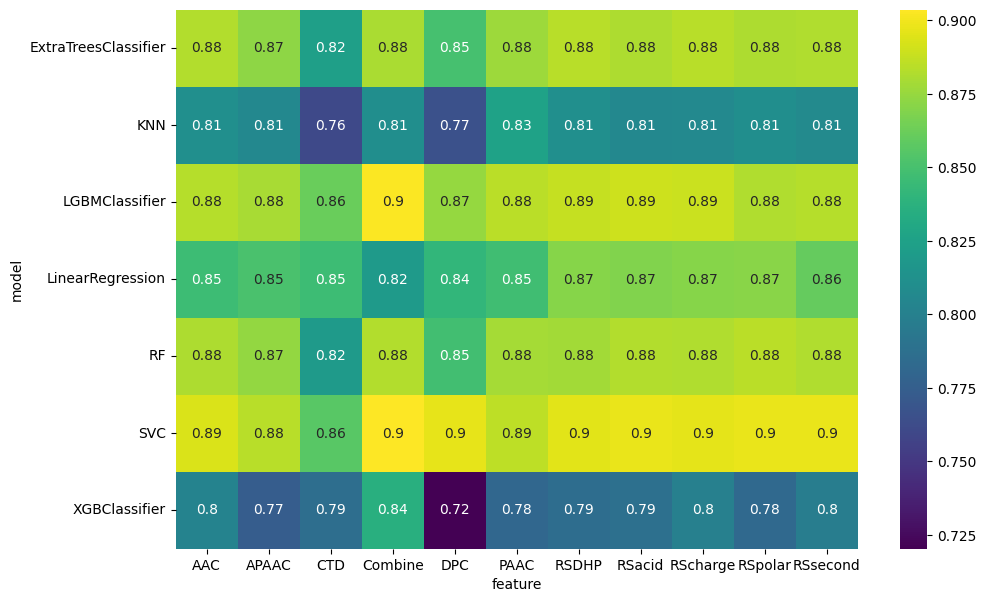

In [8]:
fig, ax = plt.subplots(figsize=(11,7))
sns.heatmap(metrics["accuracy"].unstack(), annot=True,cmap=sns.color_palette("viridis", as_cmap=True),ax=ax)

In [9]:
metrics["f1"].unstack()

feature,AAC,APAAC,CTD,Combine,DPC,PAAC,RSDHP,RSacid,RScharge,RSpolar,RSsecond
model,,,,,,,,,,,
ExtraTreesClassifier,0.882499,0.871929,0.822592,0.880185,0.849623,0.876217,0.883641,0.880922,0.883677,0.880922,0.881701
KNN,0.810127,0.802167,0.760402,0.810384,0.764631,0.823250,0.810468,0.804930,0.806214,0.809956,0.806764
LGBMClassifier,0.882955,0.879421,0.861552,0.902574,0.874641,0.884532,0.887255,0.889222,0.888409,0.881355,0.883338
LinearRegression,0.845783,0.848580,0.845749,0.819416,0.840672,0.845674,0.870171,0.868591,0.870177,0.871347,0.859952
RF,0.880334,0.873824,0.819214,0.882433,0.847753,0.878574,0.877903,0.881890,0.881513,0.883871,0.881489
SVC,0.893157,0.883447,0.855777,0.903313,0.896670,0.885015,0.895040,0.897017,0.895474,0.897380,0.897497
XGBClassifier,0.801733,0.773407,0.785995,0.835764,0.720263,0.780349,0.785119,0.787417,0.799677,0.782443,0.797009


<Axes: xlabel='feature', ylabel='model'>

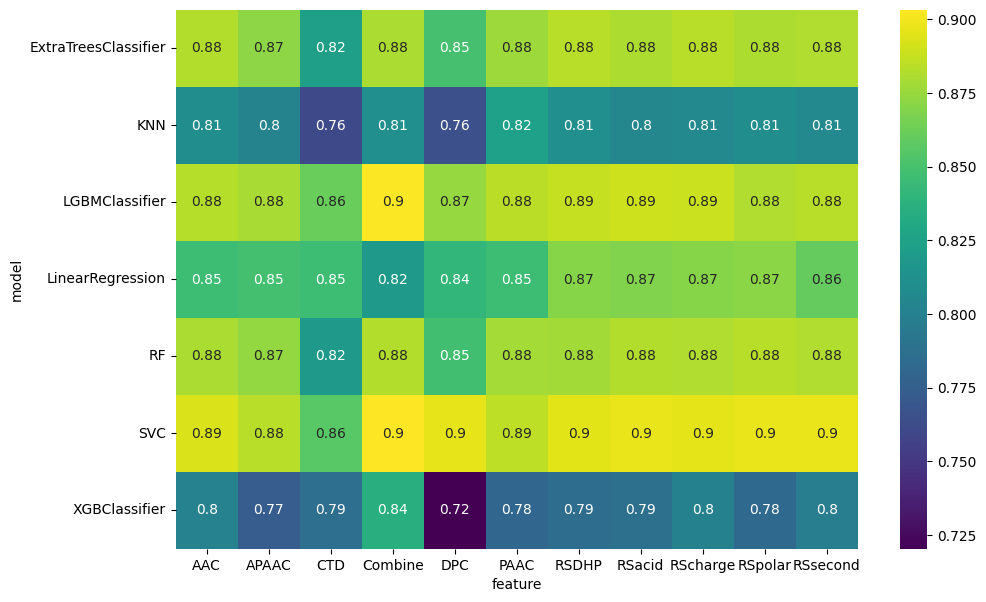

In [10]:
fig, ax = plt.subplots(figsize=(11,7))
sns.heatmap(metrics["f1"].unstack(), annot=True,cmap=sns.color_palette("viridis", as_cmap=True),ax=ax)